In [1]:
# Density, diffusion, activation energy and ionic conductivity 
from pyiron import Project
from pyiron import ase_to_pyiron, pyiron_to_ase
import sys  
sys.path.insert(0, '/nfshome/deshmukh/vaibhav/scripts')
import analysis_msd as ms

Diffusion coefficient = 1.322e-10 [M^2/sec]
Diffusion coefficient = 1.905e-10 [M^2/sec]
Diffusion coefficient = 4.167e-10 [M^2/sec]
Diffusion coefficient = 7.049e-14 [M^2/sec]


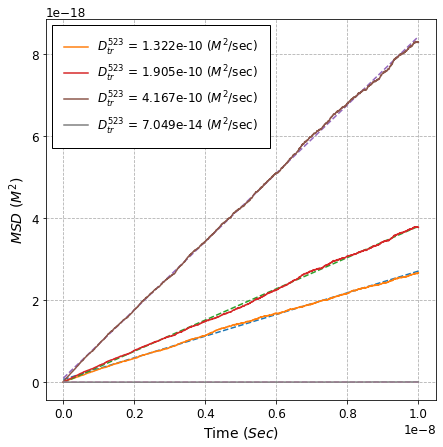

In [3]:
# Tilt_auto, amisgb_ck
# Grain diffusion coefficient, x, y z and average 
d,x,y = ms.msd.dff_coefficient(file='/nfshome/deshmukh/vaibhav/schulze_project/gb/IDp03_aimsgbCK/00-minimize/01-heat-523/02-diffusion/na_diffusion_tilt_auto.txt',dim=1,temp=523,save=False,file_2="avg_msd_773k_5.png",y_val=18)
d_1,x_1,y_1 = ms.msd.dff_coefficient(file='/nfshome/deshmukh/vaibhav/schulze_project/gb/IDp03_aimsgbCK/00-minimize/01-heat-523/02-diffusion/na_diffusion_tilt_auto.txt',dim=1,temp=523,save=False,file_2="avg_msd_773k_5.png",y_val=19)
d_2,x_2,y_2 = ms.msd.dff_coefficient(file='/nfshome/deshmukh/vaibhav/schulze_project/gb/IDp03_aimsgbCK/00-minimize/01-heat-523/02-diffusion/na_diffusion_tilt_auto.txt',dim=1,temp=523,save=False,file_2="avg_msd_773k_5.png",y_val=20)
d_3,x_3,y_3 = ms.msd.dff_coefficient(file='/nfshome/deshmukh/vaibhav/schulze_project/gb/IDp03_aimsgbCK/00-minimize/01-heat-523/02-diffusion/na_diffusion_tilt_auto.txt',dim=3,temp=523,save=True,file_2="tilr_auto_grain_x_y_z_avg_523k.png",y_val=21)


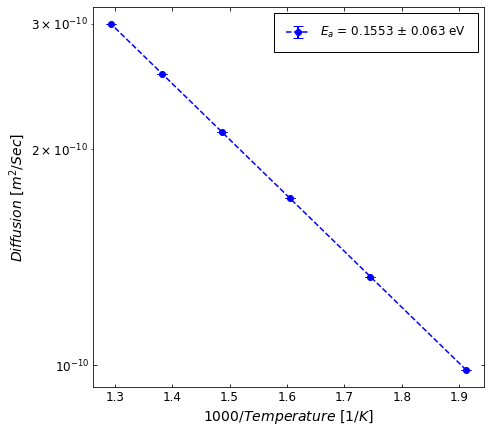

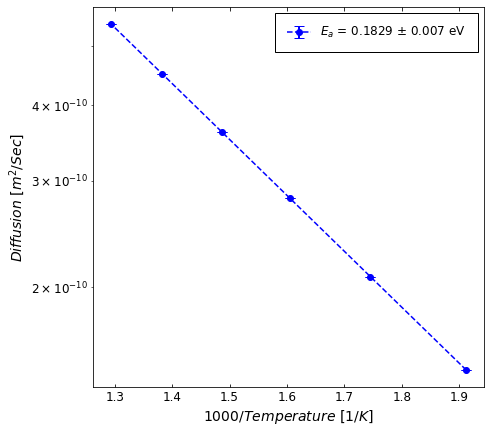

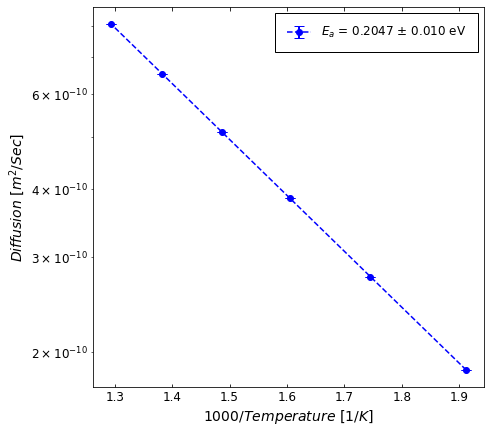

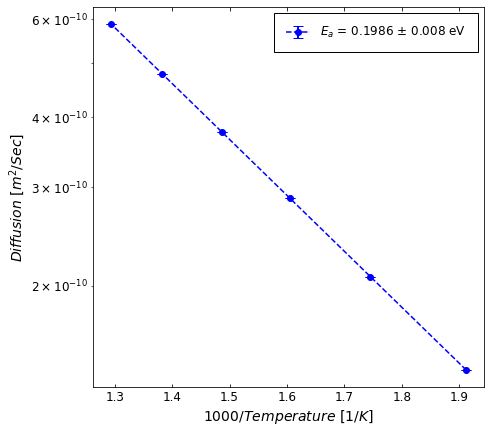

In [85]:
# grain x,y,z,avg
x_x = ms.msd.get_arrhenius_plot(temps=[523,573,623,673,723,773],diffusivities=[9.513e-11,1.364e-10,1.914e-10,2.457e-10,1.364e-10,4.331e-10],save=True,file='activation_energy_grain_tilt_auto_x.png')
x_y = ms.msd.get_arrhenius_plot(temps=[523,573,623,673,723,773],diffusivities=[1.477e-10,2.082e-10,2.865e-10,3.338e-10,4.607e-10,5.552e-10],save=True,file='activation_energy_grain_tilt_auto_y.png')
x_z = ms.msd.get_arrhenius_plot(temps=[523,573,623,673,723,773],diffusivities=[1.912e-10,2.729e-10,3.880e-10,4.816e-10,6.169e-10,8.786e-10],save=True,file='activation_energy_grain_tilt_auto_z.png')
x_a = ms.msd.get_arrhenius_plot(temps=[523,573,623,673,723,773],diffusivities=[1.447e-10,2.058e-10,2.886e-10,3.537e-10,4.693e-10,6.223e-10],save=True,file='activation_energy_grain_tilt_auto_avg.png')

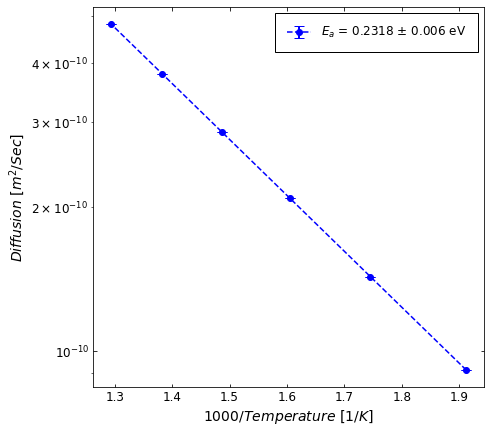

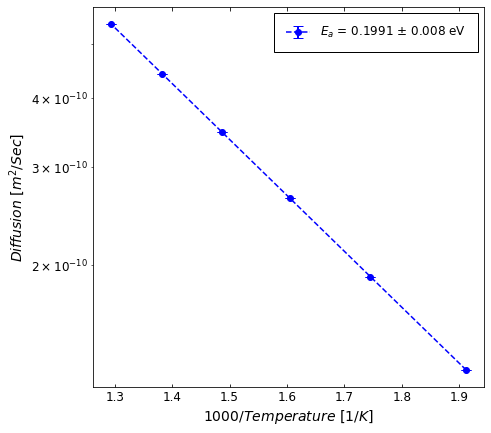

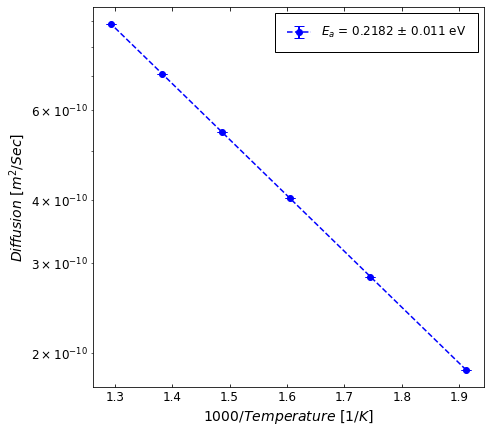

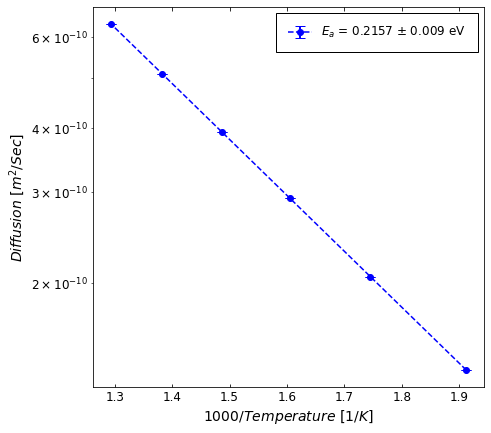

In [6]:
# Overall 
x_x = ms.msd.get_arrhenius_plot(temps=[523,573,623,673,723,773],diffusivities=[9.398e-11,1.401e-10,2.087e-10,2.722e-10,3.781e-10,5.019e-10],save=True,file='activation_energy_box_tilt_auto_x.png')
x_y = ms.msd.get_arrhenius_plot(temps=[523,573,623,673,723,773],diffusivities=[1.322e-10,1.899e-10,2.701e-10,3.191e-10,4.435e-10,5.660e-10],save=True,file='activation_energy_box_tilt_auto_y.png')
x_z = ms.msd.get_arrhenius_plot(temps=[523,573,623,673,723,773],diffusivities=[1.905e-10,2.753e-10,4.210e-10,5.012e-10,6.786e-10,9.569e-10],save=True,file='activation_energy_box_tilt_auto_z.png')
x_a = ms.msd.get_arrhenius_plot(temps=[523,573,623,673,723,773],diffusivities=[1.389e-10,2.018e-10,2.999e-10,3.642e-10,5.001e-10,6.749e-10],save=True,file='activation_energy_box_tilt_auto_avg.png')

In [76]:
def df_y(d_grain,d_overall,w_gb,L):

    #x = (L/2*w_gb)*(d_overall+(d_grain*(((2*w_gb)/L)-1)))
    x = (L/2*w_gb)*(d_overall-d_grain) + d_grain

    return x

def df_x(d_grain,d_overall,w_gb,L):

    x = ((2*w_gb*d_grain*d_overall)/((L*d_grain - d_overall*L + (2*w_gb*d_overall))))

    return x

In [77]:
diffusivities_x_grain=[9.513e-11,1.364e-10,1.914e-10,2.457e-10,1.364e-10,4.331e-10]
diffusivities_x_overall=[9.398e-11,1.401e-10,2.087e-10,2.722e-10,3.781e-10,5.019e-10]
diff_x = []

for i,j in zip(diffusivities_x_grain,diffusivities_x_overall):

    d = df_x(d_grain=i,d_overall=j,w_gb=20,L=223.351)
    diff_x.append(d)

diff_x    

[8.904579648730537e-11,
 1.5999359343777816e-10,
 3.5633303514159804e-10,
 5.38352734349413e-10,
 -5.3085871341627786e-11,
 1.8462693912190908e-09]

In [78]:
diffusivities_y_grain = [1.477e-10,2.082e-10,2.865e-10,3.338e-10,4.607e-10,5.552e-10]
diffusivities_z_grain = [1.912e-10,2.729e-10,3.880e-10,4.816e-10,6.169e-10,8.786e-10]
diffusivities_y_overall=[1.322e-10,1.899e-10,2.701e-10,3.191e-10,4.435e-10,5.660e-10]
diffusivities_z_overall=[1.389e-10,2.018e-10,2.999e-10,3.642e-10,5.001e-10,6.749e-10]

In [69]:
diff_y = []

for i,j in zip(diffusivities_y_grain,diffusivities_y_overall):

    d = df_y(d_grain=i,d_overall=j,w_gb=20,L=64.77)
    diff_y.append(d)

diff_y 

[4.9040649999999996e-08,
 7.142709e-08,
 1.0397771999999998e-07,
 1.2399881e-07,
 1.7313956e-07,
 2.2907515999999998e-07]

In [79]:
diff_z = []

for i,j in zip(diffusivities_z_grain,diffusivities_z_overall):

    d = df_y(d_grain=i,d_overall=j,w_gb=20,L=15.31)
    diff_z.append(d)

diff_z 

[6.847286999999999e-08,
 9.827458999999998e-08,
 1.4171189e-07,
 1.7466606e-07,
 2.2887791999999997e-07,
 3.202535299999999e-07]

In [80]:
diff_avg = []

for i,j,k in zip(diff_x,diff_y,diff_z):

    diff_avg.append((i+j+k)/3)

diff_avg

[3.9200855265495765e-08,
 5.6620557864479254e-08,
 8.201531434504718e-08,
 9.973440757811646e-08,
 1.3398813137621944e-07,
 1.8372498646373965e-07]

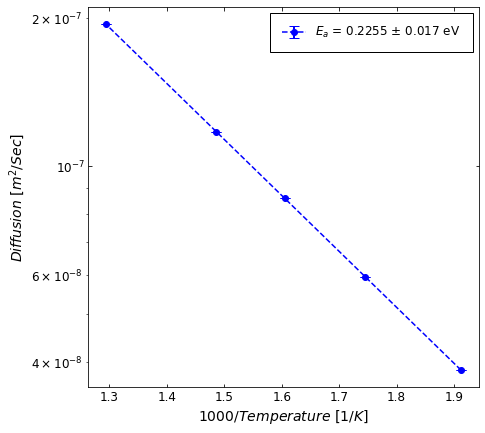

In [81]:
x_x = ms.msd.get_arrhenius_plot(temps=[523,573,623,673,773],diffusivities=[3.920085824910039e-08,5.662054337134766e-08,8.201515371305761e-08,1.3398809266039287e-07,1.8372184683848795e-07],save=True,file='activation_energy_box_tilt_auto_x.png')

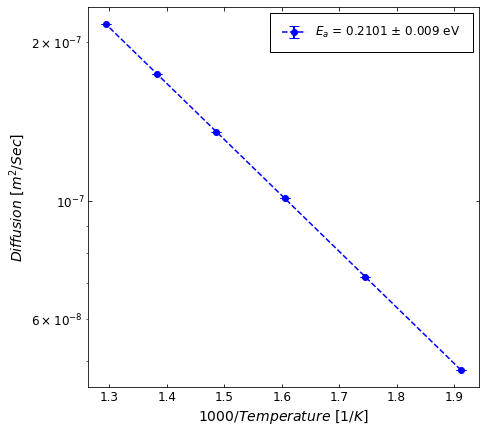

In [83]:
x_x = ms.msd.get_arrhenius_plot(temps=[523,573,623,673,723,773],diffusivities=[4.9040649999999996e-08,7.142709e-08,1.0397771999999998e-07,1.2399881e-07,1.7313956e-07,2.2907515999999998e-07],save=True,file='activation_energy_box_tilt_auto_x.png')

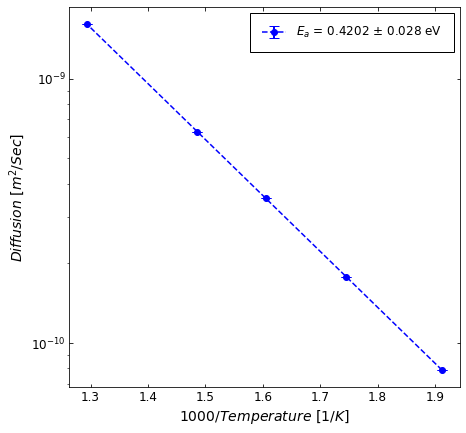

In [82]:
x_x = ms.msd.get_arrhenius_plot(temps=[523,573,623,673,773],diffusivities=[8.905474730118411e-11,1.5995011404298085e-10,3.5585113917284656e-10,5.373469117203982e-10,1.8368505154639177e-09],save=True,file='activation_energy_box_tilt_auto_x.png')

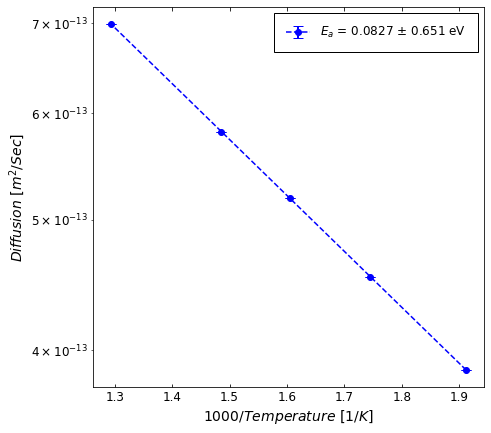

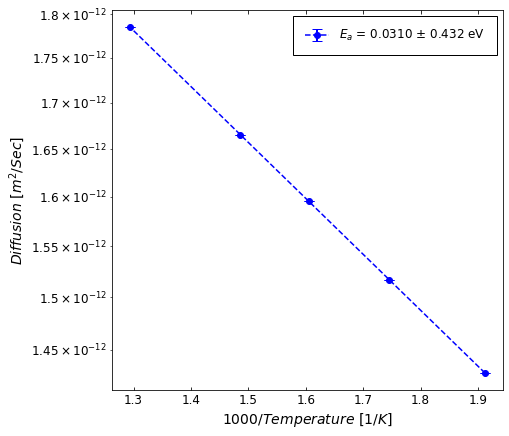

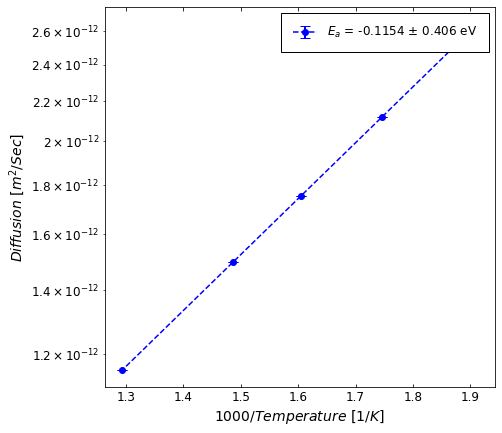

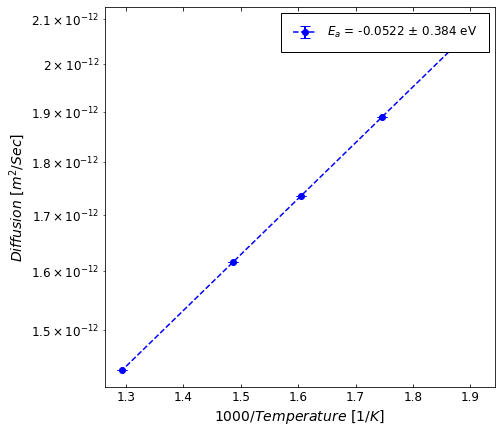

In [84]:
x_x = ms.msd.get_arrhenius_plot(temps=[523,573,623,673,773],diffusivities=[1.695e-12,1.892e-12,2.080e-15,1.332e-12,4.155e-12],save=True,file='activation_energy_gb_tilt_auto_x.png')
x_y = ms.msd.get_arrhenius_plot(temps=[523,573,623,673,773],diffusivities=[1.736e-11,2.299e-13,2.153e-13,1.166e-12,1.026e-11],save=True,file='activation_energy_gb_tilt_auto_y.png')
x_z = ms.msd.get_arrhenius_plot(temps=[523,573,623,673,773],diffusivities=[2.146e-11,5.133e-13,1.319e-13,3.263e-12,3.566e-12],save=True,file='activation_energy_gb_tilt_auto_z.png')
x_a = ms.msd.get_arrhenius_plot(temps=[523,573,623,673,773],diffusivities=[1.350e-11,8.784e-13,1.164e-13,1.920e-12,5.992e-12],save=True,file='activation_energy_gb_tilt_auto_avg.png')